In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, normalize
from sklearn import datasets
from sklearn.cross_validation import KFold, cross_val_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import time

bcdf = pd.read_csv("./dataset/data breast cancer.csv")
bcdf.shape

(569, 33)

In [2]:
bcdf.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
col = bcdf.columns
print (col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
y = bcdf.diagnosis
list = ['Unnamed: 32', 'id', 'diagnosis']
x = bcdf.drop(list, axis=1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign: 357
Number of Malignant: 212


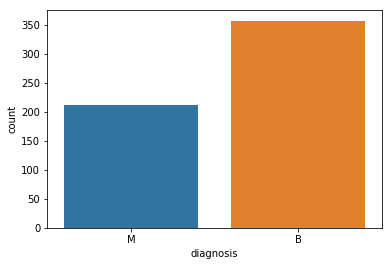

In [5]:
# Diagnosis

ax = sns.countplot(y, label='count')
B, M = y.value_counts()

print ('Number of Benign:', B)
print ('Number of Malignant:', M)

# Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

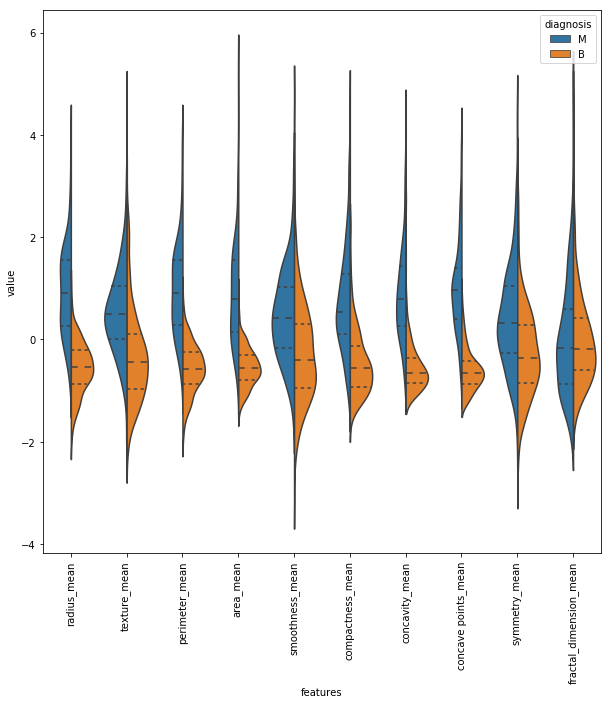

In [6]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt (data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [7]:
# dari plot diatas dapat disimpulkan bahwa texture_mean feature, median dari Malignant dan Benign terlihat seperti
# terpisah dan itu bagus untuk mengklasifikasi

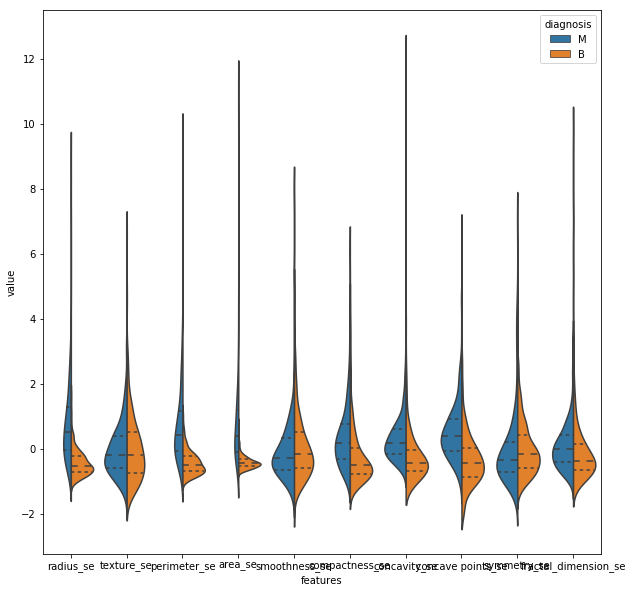

In [8]:
# second ten features
data = pd.concat([y, data_n_2.iloc[:,10:20]], axis=1)
data = pd.melt (data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")

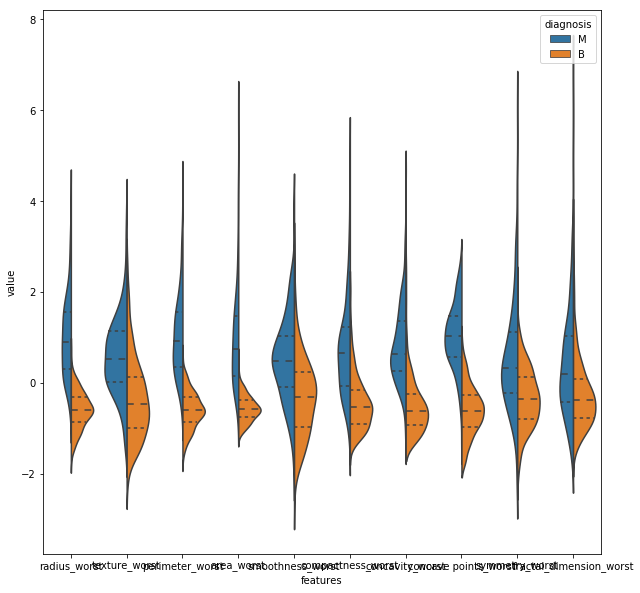

In [9]:
# third ten features
data = pd.concat ([y, data_n_2.iloc[:,20:31]], axis=1)
data = pd.melt (data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart") 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

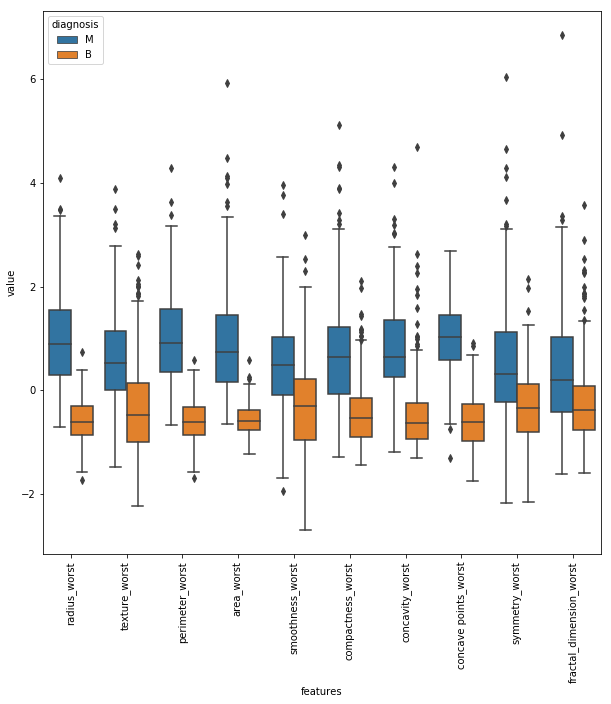

In [10]:
# fourth ten features
# alternative dari violin plot adalah box plot
# box plot sangatn berguna untuk melihat outliers
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [11]:
# concavity_worst dan cocave_points_worst terlihat similiar
# untuk mengetahui lebih dalam, lihat joint plot dibawah

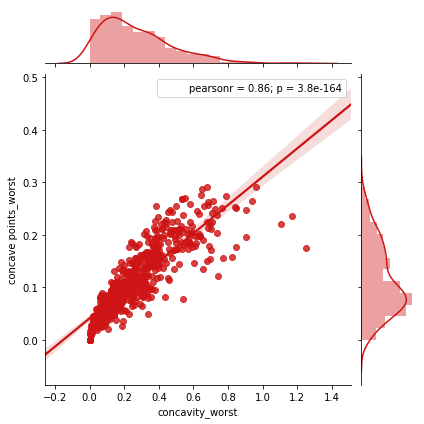

In [12]:
sns.jointplot(x.loc[:,"concavity_worst"], x.loc[:,"concave points_worst"], kind="regg", color="#ce1414")

/Users/albunyawi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


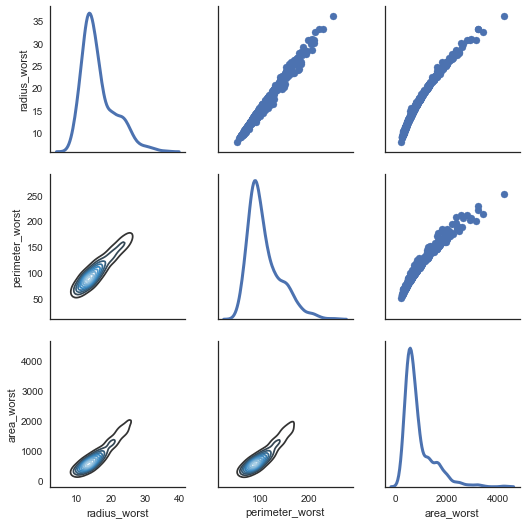

In [13]:
sns.set(style="white")
df = x.loc[:,["radius_worst", "perimeter_worst", "area_worst"]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

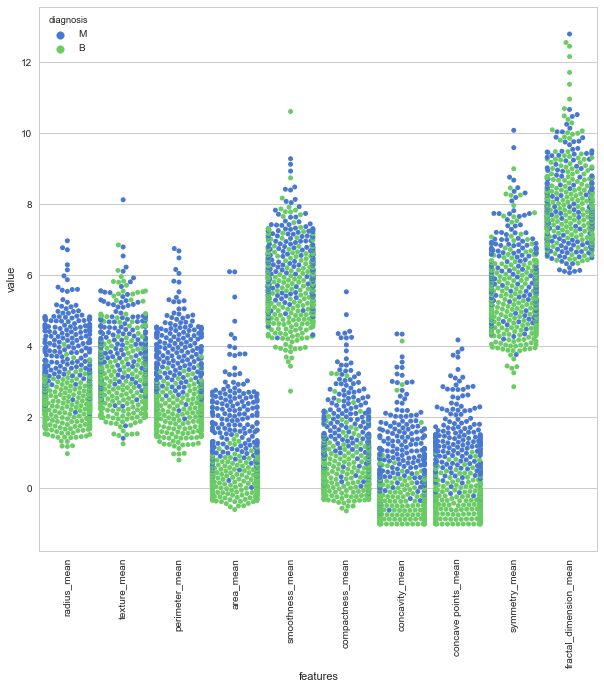

In [14]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.std()) / (data.std())
data = pd.concat ([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt (data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

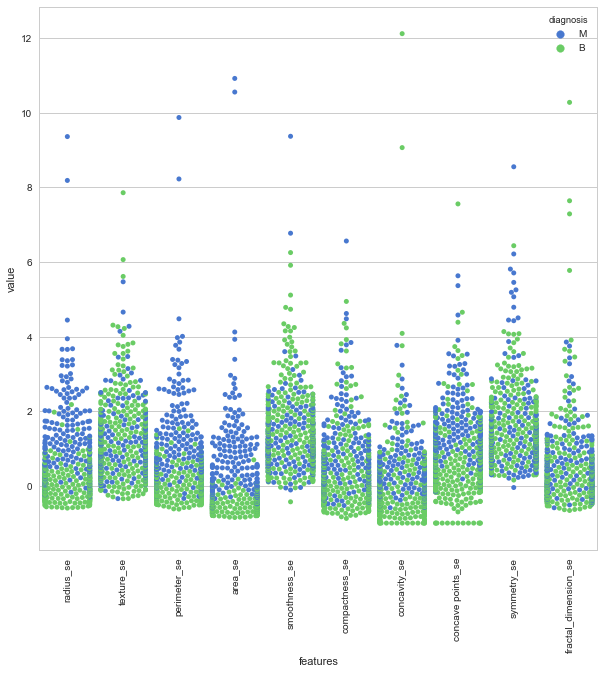

In [15]:
data = pd.concat ([y, data_n_2.iloc[:,10:20]], axis=1)
data = pd.melt (data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  15.407059907913208  s


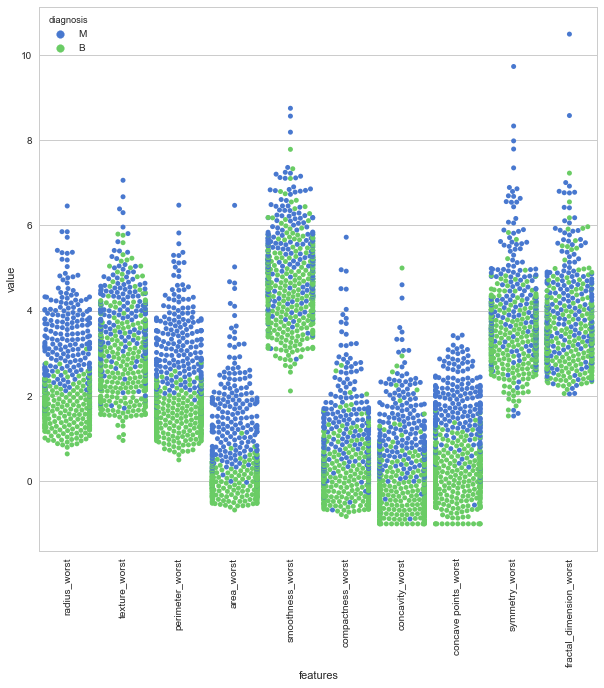

In [16]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

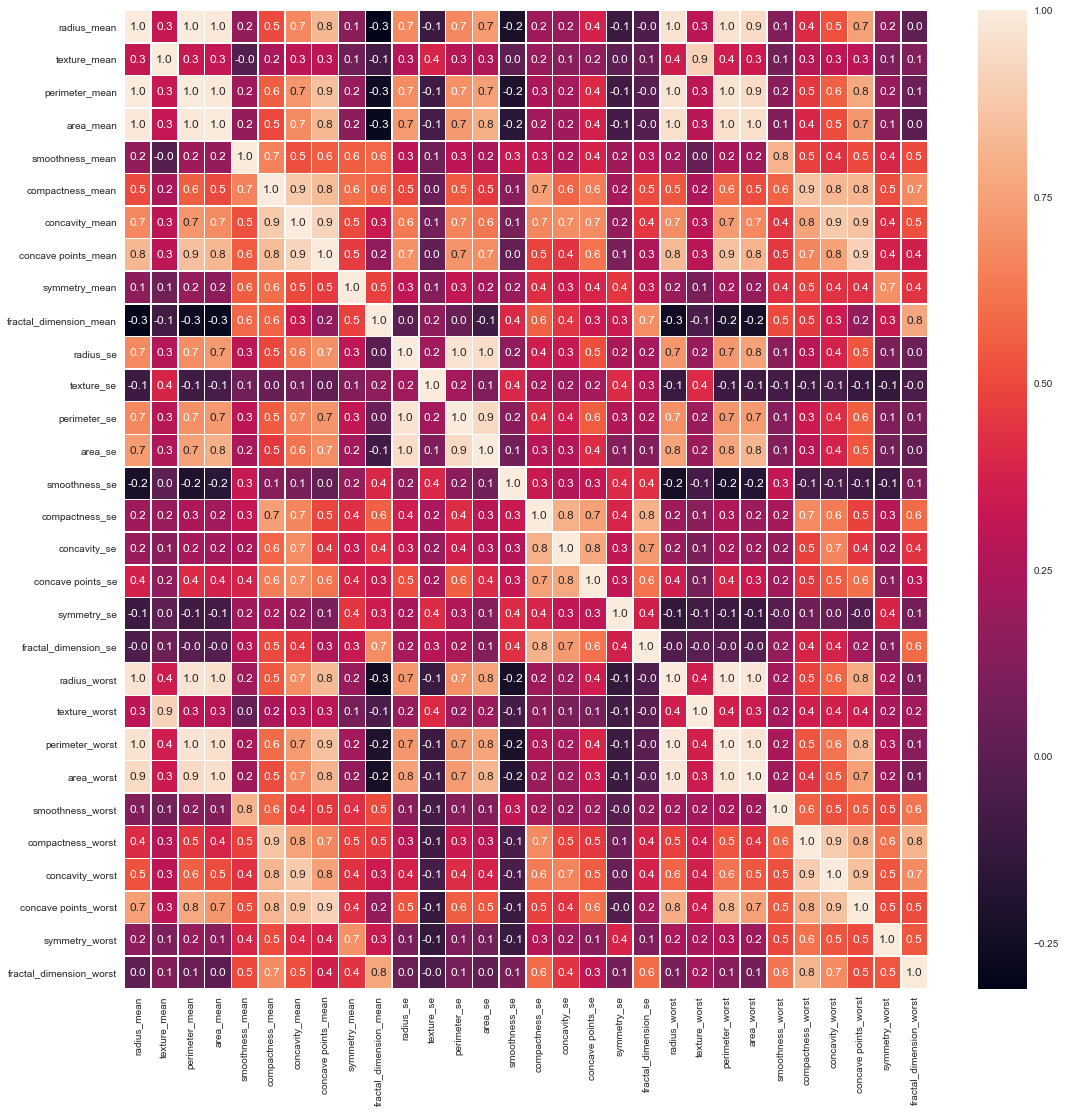

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

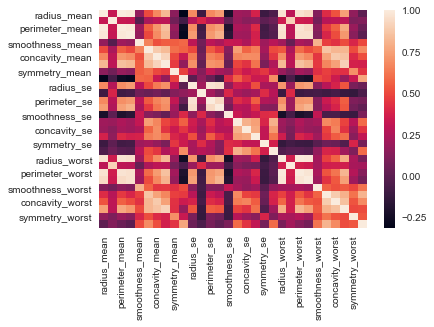

In [18]:
sns.heatmap(x.corr())
sns.set_style("whitegrid")
plt.show()

# Preprocessing

In [19]:
# split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size=.8)


/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
# Normalization

norm = Normalizer()

# Fit

norm.fit(x_train)

# Transform both training and testing sets

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

# Model Testing

In [21]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [22]:
SVM_params = {'C': [0.001, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 
LR_params = {'C': [0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage' :[None]}
KNN_params = {'n_neighbors': [1,5,10,20,50], 'p' :[2], 'metric': ['minkowski']}
RF_params = {'n_estimators': [10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10,50,100]}

In [23]:
# Append list of models with parameter dictionaries

models_opt = []
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(), KNN_params))
models_opt.append(('RF', RandomForestClassifier(), RF_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))

In [24]:
results = []
names = []


def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
    for name, model, params in models_opt:
    
        kfold = KFold(len(x_train_norm), n_folds=5, random_state=2, shuffle=True)

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, x_train_norm, y_train, cv = kfold, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)


In [25]:
estimator_function(models_opt, scoring = 'accuracy')

Cross Validation Accuracy SVM: Accarcy: 0.914286 SD: 0.029812
Cross Validation Accuracy LR: Accarcy: 0.909890 SD: 0.021308
Cross Validation Accuracy LDA: Accarcy: 0.956044 SD: 0.018388
Cross Validation Accuracy KNN: Accarcy: 0.929670 SD: 0.021534
Cross Validation Accuracy RF: Accarcy: 0.967033 SD: 0.012038
Cross Validation Accuracy DTC: Accarcy: 0.949451 SD: 0.014906


# Ensemble Voting

In [26]:
# Ensemble Voting

# Create list for estimators
estimators = []

# Create estimator object
model1 = LogisticRegression()

# Append list with estimator name and object
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model6))

voting = VotingClassifier(estimators)


kfold = KFold(len(x_train_norm), n_folds=5, random_state=2, shuffle=True)


results_voting = cross_val_score(voting, x_train_norm, y_train, cv=kfold)
results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))

Accuracy: 0.9318681318681318 SD: 0.027274008013166727


/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/albunyawi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

# Linear Discriminant Analysis (LDA)

In [27]:
# Instantiate a new LDA model
lda_2 = LinearDiscriminantAnalysis()

# Fit LDA model to the entire training data
lda_2.fit(x_train_norm, y_train)

# Test LDA model on test data
lda_2_predicted = lda_2.predict(x_test_norm)

In [28]:
accuracy_score(y_test, lda_2_predicted)

0.9736842105263158

In [31]:
print(classification_report(y_test, lda_2_predicted))

             precision    recall  f1-score   support

          B       0.96      1.00      0.98        73
          M       1.00      0.93      0.96        41

avg / total       0.97      0.97      0.97       114



In [75]:
f1_score(y_test, lda_2_predicted, average='micro')

0.9736842105263158

# Random Forest Classifier

In [48]:
# Parameters
RC_params = {'n_estimators':[10,50,100,200]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Fit model to traing Data
RFC_2.fit(x_train_norm, y_train)

# Test
RFC_2_predicted = RFC_2.predict(x_test_norm)

In [50]:
print('Accuracy score: {}'.format(accuracy_score(y_test, RFC_2_predicted)))

Accuracy score: 0.9473684210526315


In [51]:
print(classification_report(y_test, RFC_2_predicted))

             precision    recall  f1-score   support

          B       0.95      0.97      0.96        73
          M       0.95      0.90      0.92        41

avg / total       0.95      0.95      0.95       114



In [74]:
f1_score(y_test, RFC_2_predicted, average='micro')

0.9473684210526315

# Logistic Regression

In [53]:
LR_2 = LogisticRegression()
LR_2.fit(x_train_norm, y_train)
LR_2_pred = LR_2.predict(x_test_norm)

In [54]:
print (accuracy_score(y_test, LR_2_pred))

0.8157894736842105


In [56]:
print (classification_report(y_test, LR_2_pred))

             precision    recall  f1-score   support

          B       0.78      1.00      0.87        73
          M       1.00      0.49      0.66        41

avg / total       0.86      0.82      0.80       114



In [73]:
f1_score(y_test, LR_2_pred, average='micro')

0.8157894736842104